In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, f1_score, roc_curve, auc, 
                             precision_score, recall_score, mean_squared_error)





# Завантажте датасет

In [3]:
dfload = load_breast_cancer()


## 2. Проведіть попередній аналіз даних
## Перегляньте перші кілька рядків
## Перевірте назви стовпців та типи даних
## Перевірте наявність пропущених значень
## Досліджуйте розмір даних

In [6]:
df = pd.DataFrame(data=np.c_[dfload.data, dfload.target], columns=np.append(dfload.feature_names, ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
df.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [9]:
df.dtypes


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [11]:
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
df.shape

(569, 31)

# 3. Побудова і налаштування моделей
Розділіть дані на навчальний і тестовий набори
Побудуйте три моделі класифікації (на власний вибір),
наприклад: Логістична регресія, Дерево рішень, Випадковий лісд
Підберіть оптимальні параметри для кожної моделі за допомогою
GridSearchCV (можна вибрати інший оптимізатор)

In [18]:
data = dfload.data
target = dfload.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#Логістична регресія
logr = LogisticRegression(random_state=0, max_iter=5000).fit(X_train_scaled, y_train)
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l2']
}
grid_search = GridSearchCV(estimator=logr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Кращі параметри ", grid_search.best_params_)

best_lr_model = grid_search.best_estimator_

Кращі параметри  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [26]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
rdfr = RandomForestClassifier(random_state=0)
grid_search1 = GridSearchCV(estimator=rdfr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search1.fit(X_train_scaled, y_train)
print("Кращі параметри", grid_search1.best_params_)

best_rf_model = grid_search1.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Кращі параметри {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10}


In [29]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
tree = DecisionTreeClassifier(random_state=0)
grid_search2 = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search2.fit(X_train_scaled, y_train)
print("Кращі параметри", grid_search2.best_params_)

best_dt_model = grid_search2.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Кращі параметри {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


# 4.Оцініть моделі. Виведіть точність (accuracy) – обов’язково, матрицю помилок (confusion matrix) – за вибором та звіт про класифікацію(classification report) для кожної моделі.

In [32]:
pred = best_lr_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, pred)
print("Точність: {:.4f}".format(test_accuracy))

Точність: 0.9912


Матриця
[[42  1]
 [ 0 71]]


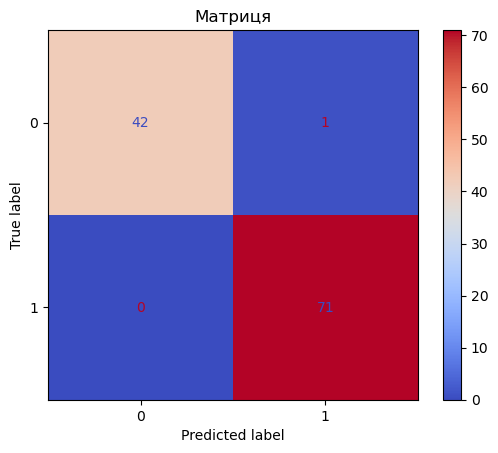

In [36]:
matrix = confusion_matrix(y_test, pred)
print("Матриця")
print(matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=best_lr_model.classes_)
disp.plot(cmap='coolwarm')

plt.title("Матриця")
plt.show()

In [44]:
print("\nClassification Report")
print(classification_report(y_test, pred, target_names=['class 0', 'class 1']))


Classification Report
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        43
     class 1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# Decision Tree

In [38]:
pred1 = best_dt_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, pred1)
print("Точність {:.4f}".format(test_accuracy))

Точність 0.9561


Матриця
[[39  4]
 [ 1 70]]


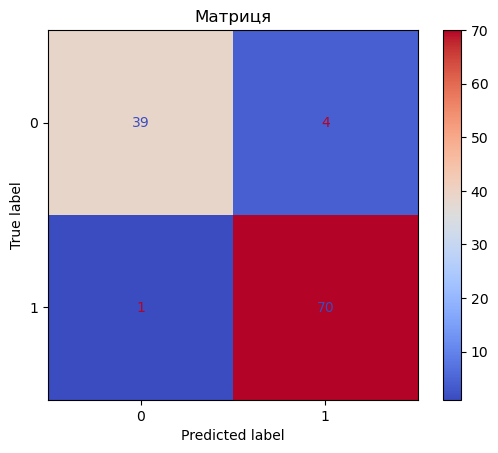

In [39]:
matrix = confusion_matrix(y_test, pred1)
print("Матриця")
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=best_dt_model.classes_)
disp.plot(cmap='coolwarm')
plt.title("Матриця")
plt.show()

In [43]:
print("\nClassification Report")
print(classification_report(y_test, pred1, target_names=['class 0', 'class 1']))


Classification Report
              precision    recall  f1-score   support

     class 0       0.97      0.91      0.94        43
     class 1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Random Forest

In [41]:
pred2 = best_rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, pred2)
print("Точність {:.4f}".format(test_accuracy))

Точність 0.9561


Матриця
[[39  4]
 [ 1 70]]


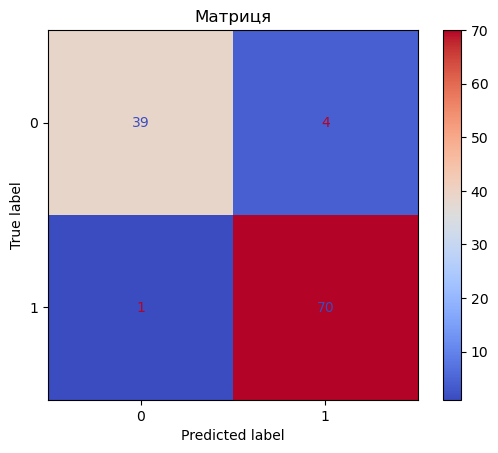

In [42]:
matrix = confusion_matrix(y_test, pred2)
print("Матриця")
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=best_rf_model.classes_)
disp.plot(cmap = 'coolwarm')
plt.title("Матриця")
plt.show()

In [45]:
print("\nClassification Report")
print(classification_report(y_test, pred2, target_names=['class 0', 'class 1']))


Classification Report
              precision    recall  f1-score   support

     class 0       0.97      0.91      0.94        43
     class 1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# 4. Прогнозування і висновки
Оберіть найкращу модель на основі метрик продуктивності
Зробіть прогноз на тестовій вибірці
Виведіть результати прогнозування

In [48]:
pred


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [49]:
pred1

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [50]:
pred2

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

# Висновок
# На основі тестової вибірки було здійснено прогнози. 
# Ми отримали найвищий результат при логістичній регресії, прогноз становить 0.9912, тому він є найкращим, інші моделі мають однаковий прогноз.

# Завдання 2

In [22]:
df = pd.read_csv('titanic.csv')


In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [62]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
df.shape

(891, 12)

In [64]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Замінюємо пропущенні значення

In [23]:
df['Age'].fillna(df['Age'].mean(skipna = True), inplace = True)
df['Fare'].fillna(df['Fare'].mean(skipna = True), inplace = True)

# Розділення на тренувальну та тестову модель, підготовка даних

In [24]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(df.drop(columns = ['Survived']), 
                                                            df['Survived'], 
                                                            test_size = 0.25, 
                                                            random_state = 42)



#Ці стовпці не несуть ніякої цінності
X_train_t.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'], axis = 1, inplace = True)
X_test_t.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'], axis = 1, inplace = True)


numeric_cols = X_train_t.select_dtypes(include = np.number).columns.tolist()
cat_cols = X_train_t.select_dtypes(include = 'object').columns.tolist()


scaler = MinMaxScaler()
scaler.fit(X_train_t[numeric_cols])

X_train_t[numeric_cols] = scaler.fit_transform(X_train_t[numeric_cols])
X_test_t[numeric_cols]  = scaler.transform(X_test_t[numeric_cols])


encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(X_train_t[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

X_train_t[encoded_cols] = encoder.transform(X_train_t[cat_cols])
X_test_t[encoded_cols]  = encoder.transform(X_test_t[cat_cols])


X_train_t = X_train_t[numeric_cols + encoded_cols]
X_test_t  = X_test_t[numeric_cols + encoded_cols]

In [25]:
def pred(y_train, y_test, y_train_pred, y_test_pred):

    plt.figure(figsize=(10, 3))

    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("Тренувальна точність {:.2f}%".format(accuracy_train * 100))
    real_f1_score(y_train, y_train_pred, 'Train')

    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("Тестова точність {:.2f}%".format(accuracy_test * 100))
    real_f1_score(y_test, y_test_pred, 'Test')

    plt.subplot(1, 2, 1)
    cf_train = confusion_matrix(y_train, y_train_pred, normalize='true')
    sns.heatmap(cf_train, annot=True, cmap='coolwarm')
    plt.xlabel('Прогнозована')
    plt.ylabel('Справжня')
    plt.title('Тренувальна матриця')

    plt.subplot(1, 2, 2) 
    cf_test = confusion_matrix(y_test, y_test_pred, normalize='true')
    sns.heatmap(cf_test, annot=True, cmap='winter')
    plt.xlabel('Прогнозована')
    plt.ylabel('Справжня') 
    plt.title('Тестова матриця')

    plt.tight_layout()
    plt.show()
def real_f1_score(target, preds, name=''):
    f1_score_ = f1_score(target, preds)
    print(f"F1 score {name}: {f1_score_:.2f}%")

def get_report(targets_train, preds_train, targets_test, preds_test):
    print('Тренувальна')
    print(classification_report(targets_train, preds_train, digits = 4))
    print('\nТестова')
    print(classification_report(targets_test, preds_test, digits = 4))

def auroc_roc(inputs, targets, model, name=''):
    y_pred_proba = model.predict_proba(inputs)[:, 1]



    fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f'AUROC {name}: {roc_auc:.4f}')

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False pos. rate')
    plt.ylabel('True pos. Rate')
    plt.title(f'ROC {name}')
    plt.legend(loc="lower right")
    plt.show()

# Логістична регресія


Тренувальна точність 80.09%
F1 score Train: 0.72%
Тестова точність 77.58%
F1 score Test: 0.71%


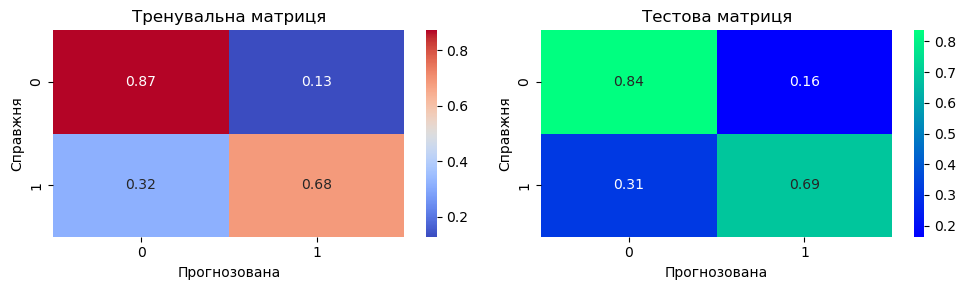

AUROC Тренувальна: 0.8479


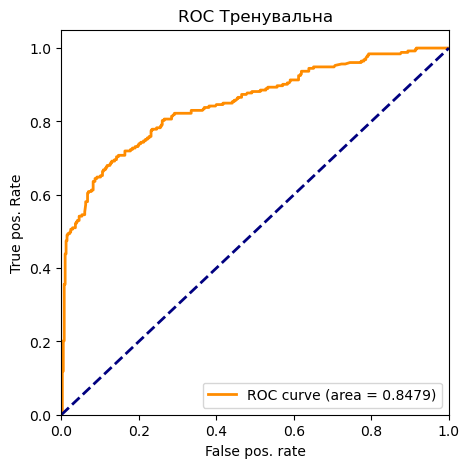

AUROC Тестова: 0.8708


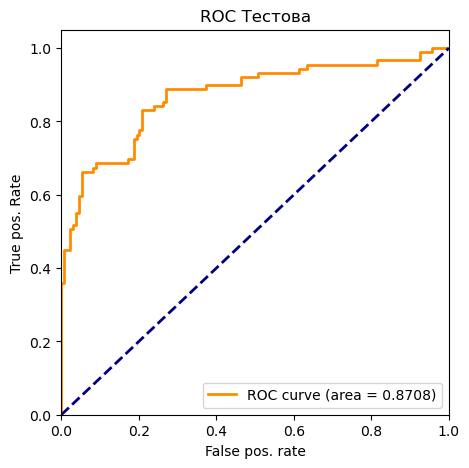

In [26]:
model_log_t = LogisticRegression(solver = 'liblinear')
model_log_t.fit(X_train_t, y_train_t)


train_pred_logistic_t = model_log_t.predict(X_train_t)
test_pred_logistic_t  = model_log_t.predict(X_test_t)


pred(y_train_t, y_test_t, train_pred_logistic_t, test_pred_logistic_t)
auroc_roc(X_train_t, y_train_t, model_log_t, 'Тренувальна')
auroc_roc(X_test_t, y_test_t, model_log_t, 'Тестова')

# Обидва графіки показують високу точність моделі

# Random Forest

Тренувальна
              precision    recall  f1-score   support

           0     0.8414    0.9205    0.8792       415
           1     0.8458    0.7154    0.7752       253

    accuracy                         0.8428       668
   macro avg     0.8436    0.8179    0.8272       668
weighted avg     0.8431    0.8428    0.8398       668


Тестова
              precision    recall  f1-score   support

           0     0.8028    0.8507    0.8261       134
           1     0.7531    0.6854    0.7176        89

    accuracy                         0.7848       223
   macro avg     0.7780    0.7681    0.7719       223
weighted avg     0.7830    0.7848    0.7828       223

Тренувальна точність 84.28%
F1 score Train: 0.78%
Тестова точність 78.48%
F1 score Test: 0.72%


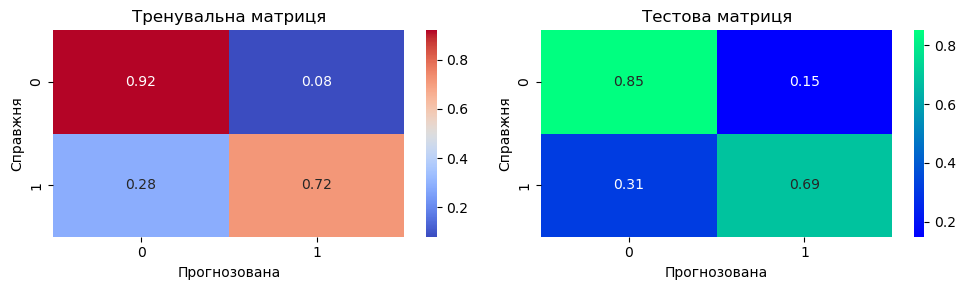

AUROC Тренувальна: 0.8985


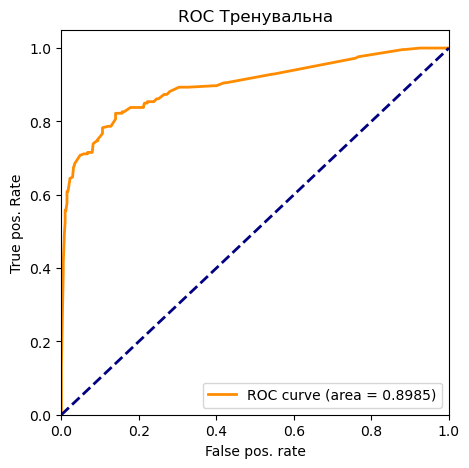

AUROC Тестова: 0.8641


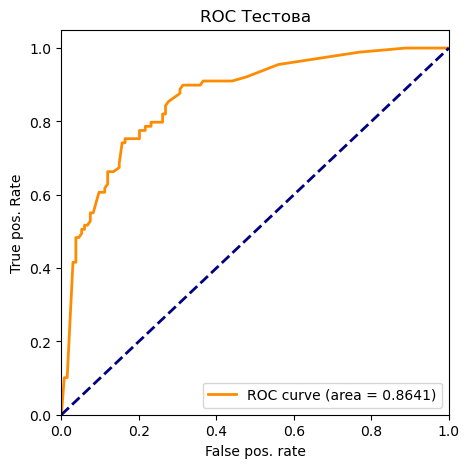

In [30]:
rdfr = RandomForestClassifier(n_estimators = 5,
                                         max_leaf_nodes = 16,
                                         n_jobs = -1,
                                         random_state = 42)

rdfr.fit(X_train_t, y_train_t)

#прогнозування моделі
train_rdfr = rdfr.predict(X_train_t)
test_rdfr  = rdfr.predict(X_test_t)

#оцінка моделі
get_report(y_train_t, train_rdfr, y_test_t, test_rdfr)
pred(y_train_t, y_test_t, train_rdfr, test_rdfr)
auroc_roc(X_train_t, y_train_t, rdfr, 'Тренувальна')
auroc_roc(X_test_t, y_test_t, rdfr, 'Тестова')

# Decision Tree

Тренувальна
              precision    recall  f1-score   support

           0     0.9741    0.9976    0.9857       415
           1     0.9959    0.9565    0.9758       253

    accuracy                         0.9820       668
   macro avg     0.9850    0.9771    0.9808       668
weighted avg     0.9824    0.9820    0.9820       668


Тестова
              precision    recall  f1-score   support

           0     0.7857    0.8209    0.8029       134
           1     0.7108    0.6629    0.6860        89

    accuracy                         0.7578       223
   macro avg     0.7483    0.7419    0.7445       223
weighted avg     0.7558    0.7578    0.7563       223

Тренувальна точність 98.20%
F1 score Train: 0.98%
Тестова точність 75.78%
F1 score Test: 0.69%


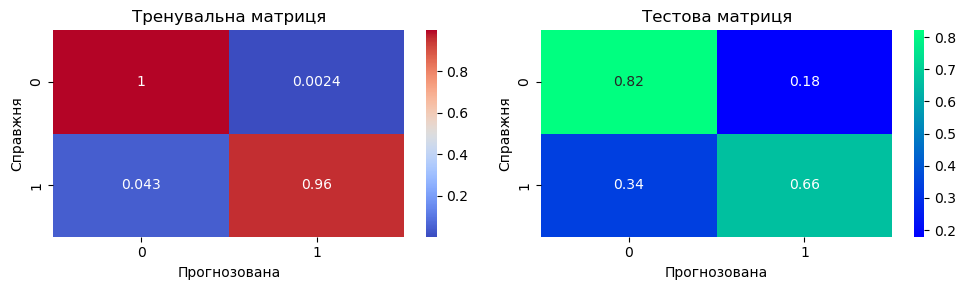

AUROC Тренувальна: 0.9992


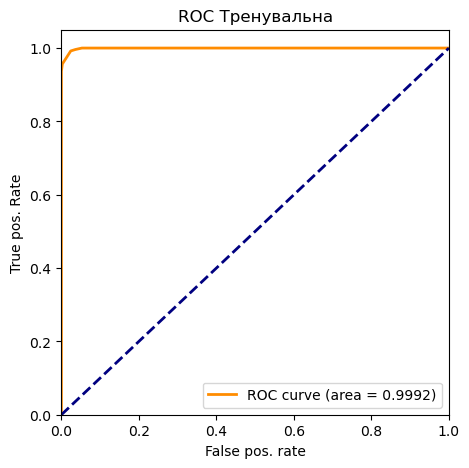

AUROC Тестова: 0.7407


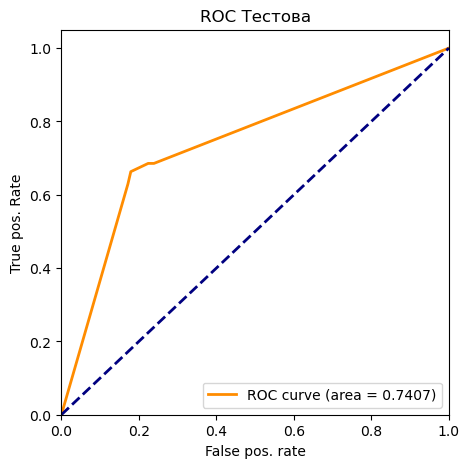

In [32]:
dtr = DecisionTreeClassifier(random_state = 42)
dtr.fit(X_train_t, y_train_t)

train_dtr = dtr.predict(X_train_t)
test_dtr  = dtr.predict(X_test_t)

get_report(y_train_t, train_dtr, y_test_t, test_dtr)
pred(y_train_t, y_test_t, train_dtr, test_dtr)
auroc_roc(X_train_t, y_train_t, dtr, 'Тренувальна')
auroc_roc(X_test_t, y_test_t, dtr, 'Тестова')

# Ця модель показує хороші результати що на тестових, що на тренувальних даних

# Висновок
# На всіх моделях можна відмітити високу точність, TPR (True Positive Rate) близкий до 1, що на тренувальних що на тестових вибірках.
